# 신용카드 사용자 연체 예측

## 풀어야 할 문제
신용카드 사용자들의 개인 신상정보 데이터로 사용자의 신용카드 대금 연체 정도를 예측

### 데이터 출처
https://www.dacon.io/competitions/official/235713/overview/description

### 변수 설명
https://www.dacon.io/competitions/official/235713/talkboard/402821/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv("sample_submission.csv")

In [2]:
# 한글 이슈 해결 - 로컬
import os
import matplotlib.pyplot as plt
if os.name == "posix":
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")

In [3]:
print(train.shape, test.shape)

(26457, 20) (10000, 19)


In [4]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


## 통계 자료 보기

In [5]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

### 데이터 타입
- 수치형: 12
- 명목형: 8
- 직업 유형 결측치 존재

In [6]:
train.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [7]:
train.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,7637.622372,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,6614.000000,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,13228.000000,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,19842.000000,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,26456.000000,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


- 자녀수 최대가 19명?

In [8]:
train['child_num'].value_counts()

0     18340
1      5386
2      2362
3       306
4        47
5        10
14        3
7         2
19        1
Name: child_num, dtype: int64

In [9]:
train['family_size'].value_counts()

2.0     14106
1.0      5109
3.0      4632
4.0      2260
5.0       291
6.0        44
7.0         9
15.0        3
9.0         2
20.0        1
Name: family_size, dtype: int64

In [10]:
# 각 열의 고유한 값의 개수 계산
unique_len = train.apply(lambda x : len(x.unique()))
unique_len

index            26457
gender               2
car                  2
reality              2
child_num            9
income_total       249
income_type          5
edu_type             5
family_type          5
house_type           6
DAYS_BIRTH        6621
DAYS_EMPLOYED     3470
FLAG_MOBIL           1
work_phone           2
phone                2
email                2
occyp_type          19
family_size         10
begin_month         61
credit               3
dtype: int64

In [11]:
# 문자열 열에 대한 요약 통계량 생성
train.describe(include=object)

,gender,car,reality,income_type,edu_type,family_type,house_type,occyp_type
count,26457,26457,26457,26457,26457,26457,26457,18286
unique,2,2,2,5,5,5,6,18
top,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,Laborers
freq,17697,16410,17830,13645,17995,18196,23653,4512


In [12]:
print(train.value_counts('income_type'))
print('--------------')
print(train.value_counts('edu_type'))
print('--------------')
print(train.value_counts('family_type'))
print('--------------')
print(train.value_counts('house_type'))
print('--------------')
print(train.value_counts('occyp_type'))
print('--------------')

income_type
Working                 13645
Commercial associate     6202
Pensioner                4449
State servant            2154
Student                     7
dtype: int64
--------------
edu_type
Secondary / secondary special    17995
Higher education                  7162
Incomplete higher                 1020
Lower secondary                    257
Academic degree                     23
dtype: int64
--------------
family_type
Married                 18196
Single / not married     3496
Civil marriage           2123
Separated                1539
Widow                    1103
dtype: int64
--------------
house_type
House / apartment      23653
With parents            1257
Municipal apartment      818
Rented apartment         429
Office apartment         190
Co-op apartment          110
dtype: int64
--------------
occyp_type
Laborers                 4512
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1575
High skill tec

In [13]:
print('gender :')
print(train['gender'].value_counts())
print('--------------')

print('Having a car or not : ')
print(train['car'].value_counts())
print('--------------')

print('Having house reality or not: ')
print(train['reality'].value_counts())
print('--------------')
      
print('Having a phone or not: ')
print(train['phone'].value_counts())
print('--------------')
      

print('Having a email or not: ')
print(train['email'].value_counts())
print('--------------')
      

print('Having a work phone or not: ')
print(train['work_phone'].value_counts())
print('--------------')

gender :
F    17697
M     8760
Name: gender, dtype: int64
--------------
Having a car or not : 
N    16410
Y    10047
Name: car, dtype: int64
--------------
Having house reality or not: 
Y    17830
N     8627
Name: reality, dtype: int64
--------------
Having a phone or not: 
0    18672
1     7785
Name: phone, dtype: int64
--------------
Having a email or not: 
0    24042
1     2415
Name: email, dtype: int64
--------------
Having a work phone or not: 
0    20511
1     5946
Name: work_phone, dtype: int64
--------------


In [14]:
train.corr()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
index,1.000000,0.001012,0.009848,-0.008901,0.004259,NaN,-0.005575,-0.001790,0.005332,-0.002867,0.002181,-0.007841
child_num,0.001012,1.000000,0.032186,0.332816,-0.228159,NaN,0.051521,-0.010555,0.016120,0.890530,-0.007229,0.004081
income_total,0.009848,0.032186,1.000000,0.064155,-0.166478,NaN,-0.034207,0.019013,0.089882,0.023839,-0.018047,0.008555
DAYS_BIRTH,-0.008901,0.332816,0.064155,1.000000,-0.616776,NaN,0.178752,-0.029247,0.111238,0.298108,0.057306,-0.025187
DAYS_EMPLOYED,0.004259,-0.228159,-0.166478,-0.616776,1.000000,NaN,-0.241827,-0.007749,-0.091090,-0.223077,0.007964,-0.003798
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_phone,-0.005575,0.051521,-0.034207,0.178752,-0.241827,NaN,1.000000,0.310256,-0.031048,0.068705,-0.008563,-0.003134
phone,-0.001790,-0.010555,0.019013,-0.029247,-0.007749,NaN,0.310256,1.000000,0.012494,-0.000132,-0.014286,0.003452
email,0.005332,0.016120,0.089882,0.111238,-0.091090,NaN,-0.031048,0.012494,1.000000,0.016122,0.002320,0.014812
family_size,-0.002867,0.890530,0.023839,0.298108,-0.223077,NaN,0.068705,-0.000132,0.016122,1.000000,-0.023032,0.008227


## 시각화

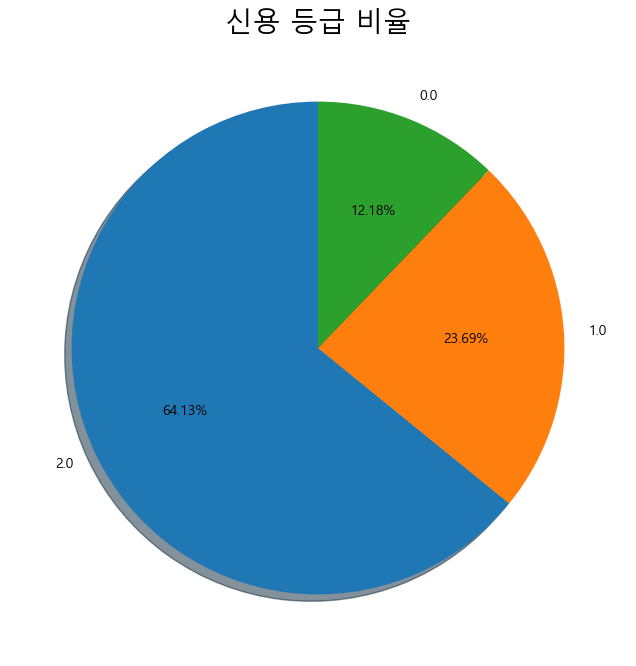

In [15]:
plt.subplots(figsize = (8,8))
plt.pie(train['credit'].value_counts(), labels = train['credit'].value_counts().index, 
        autopct="%.2f%%", shadow = True, startangle = 90)
plt.title('신용 등급 비율', size=20)
plt.show()

- 낮은 신용의 신용카드 사용자가 64% 인 것을 알 수 있다.
- 높은 신용의 신용카드 사용자는 12% 밖에 안 된다.

## 성별에 따른 신용 등급은?

In [16]:
train.groupby(['gender'])['credit'].count()

gender
F    17697
M     8760
Name: credit, dtype: int64

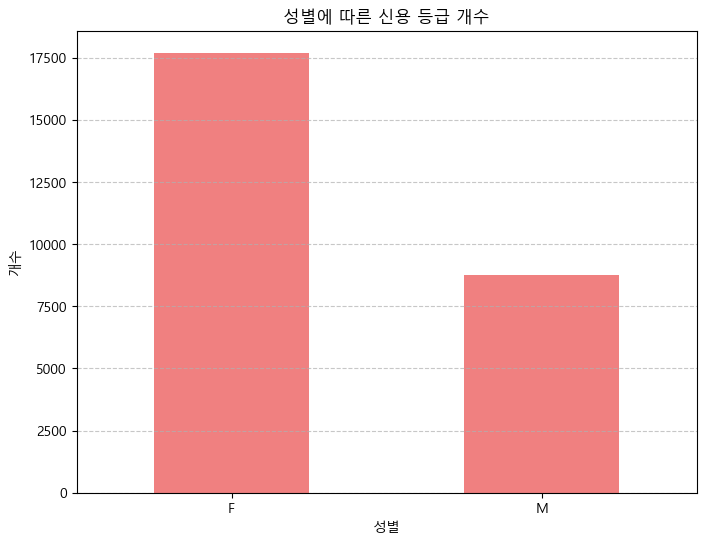

In [17]:
# 'gender'별로 그룹화하여 'credit'의 개수 세기
gender_credit_count = train.groupby('gender')['credit'].count()

# 성별에 따른 신용 등급 개수를 막대 그래프로 생성
plt.figure(figsize=(8, 6))
gender_credit_count.plot(kind='bar', color='lightcoral')
plt.title('성별에 따른 신용 등급 개수')
plt.xlabel('성별')
plt.ylabel('개수')
plt.xticks(rotation=0)  # x축 레이블 회전
plt.grid(axis='y', linestyle='--', alpha=0.7)  # y축 그리드 라인 추가

# 그래프 표시
plt.show()

In [18]:
train.groupby(['gender', 'credit'])['credit'].count()

gender  credit
F       0.0        2148
        1.0        4220
        2.0       11329
M       0.0        1074
        1.0        2047
        2.0        5639
Name: credit, dtype: int64

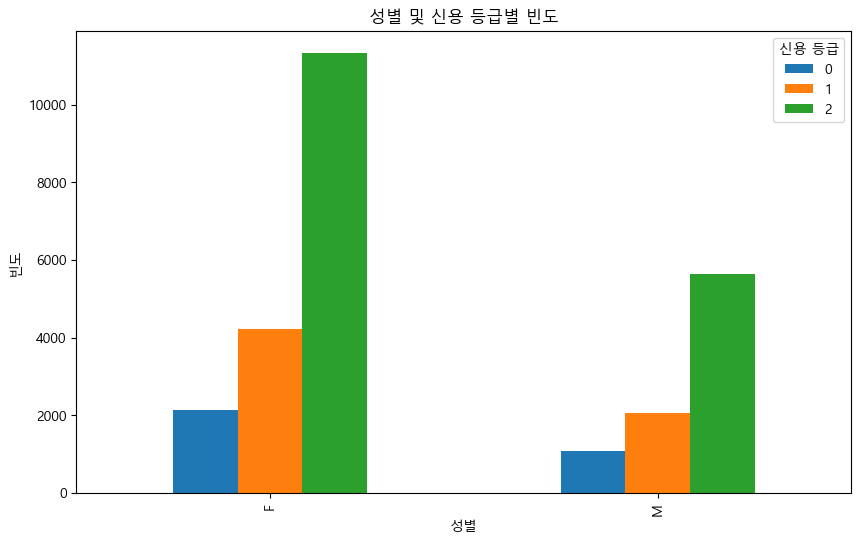

In [19]:
# 성별 및 신용 등급별로 발생한 빈도 계산
gender_credit_count = train.groupby(['gender', 'credit'])['credit'].count()

# 데이터프레임으로 변환하여 다중 인덱스를 컬럼으로 변환
gender_credit_count_df = gender_credit_count.unstack()

# 그래프 생성
gender_credit_count_df.plot(kind='bar', figsize=(10, 6))

# 그래프 제목 및 축 레이블 설정
plt.title('성별 및 신용 등급별 빈도')
plt.xlabel('성별')
plt.ylabel('빈도')

# 범례 추가
plt.legend(title='신용 등급', labels=['0', '1', '2'])

# 그래프 표시
plt.show()

## 비즈니스 가설 구축
- **가설 1**: 높은 소득을 가진 개인은 신용카드 대금 연체 가능성이 낮을 것이다.
- **가설 2**: 높은 교육 수준과 소유 부동산이 많은 개인은 신용 관리가 더 잘 될 것이다.
- **가설 3**: 가족 규모가 클수록, 특히 자녀가 많을수록 신용카드 연체 가능성이 높을 수 있다.

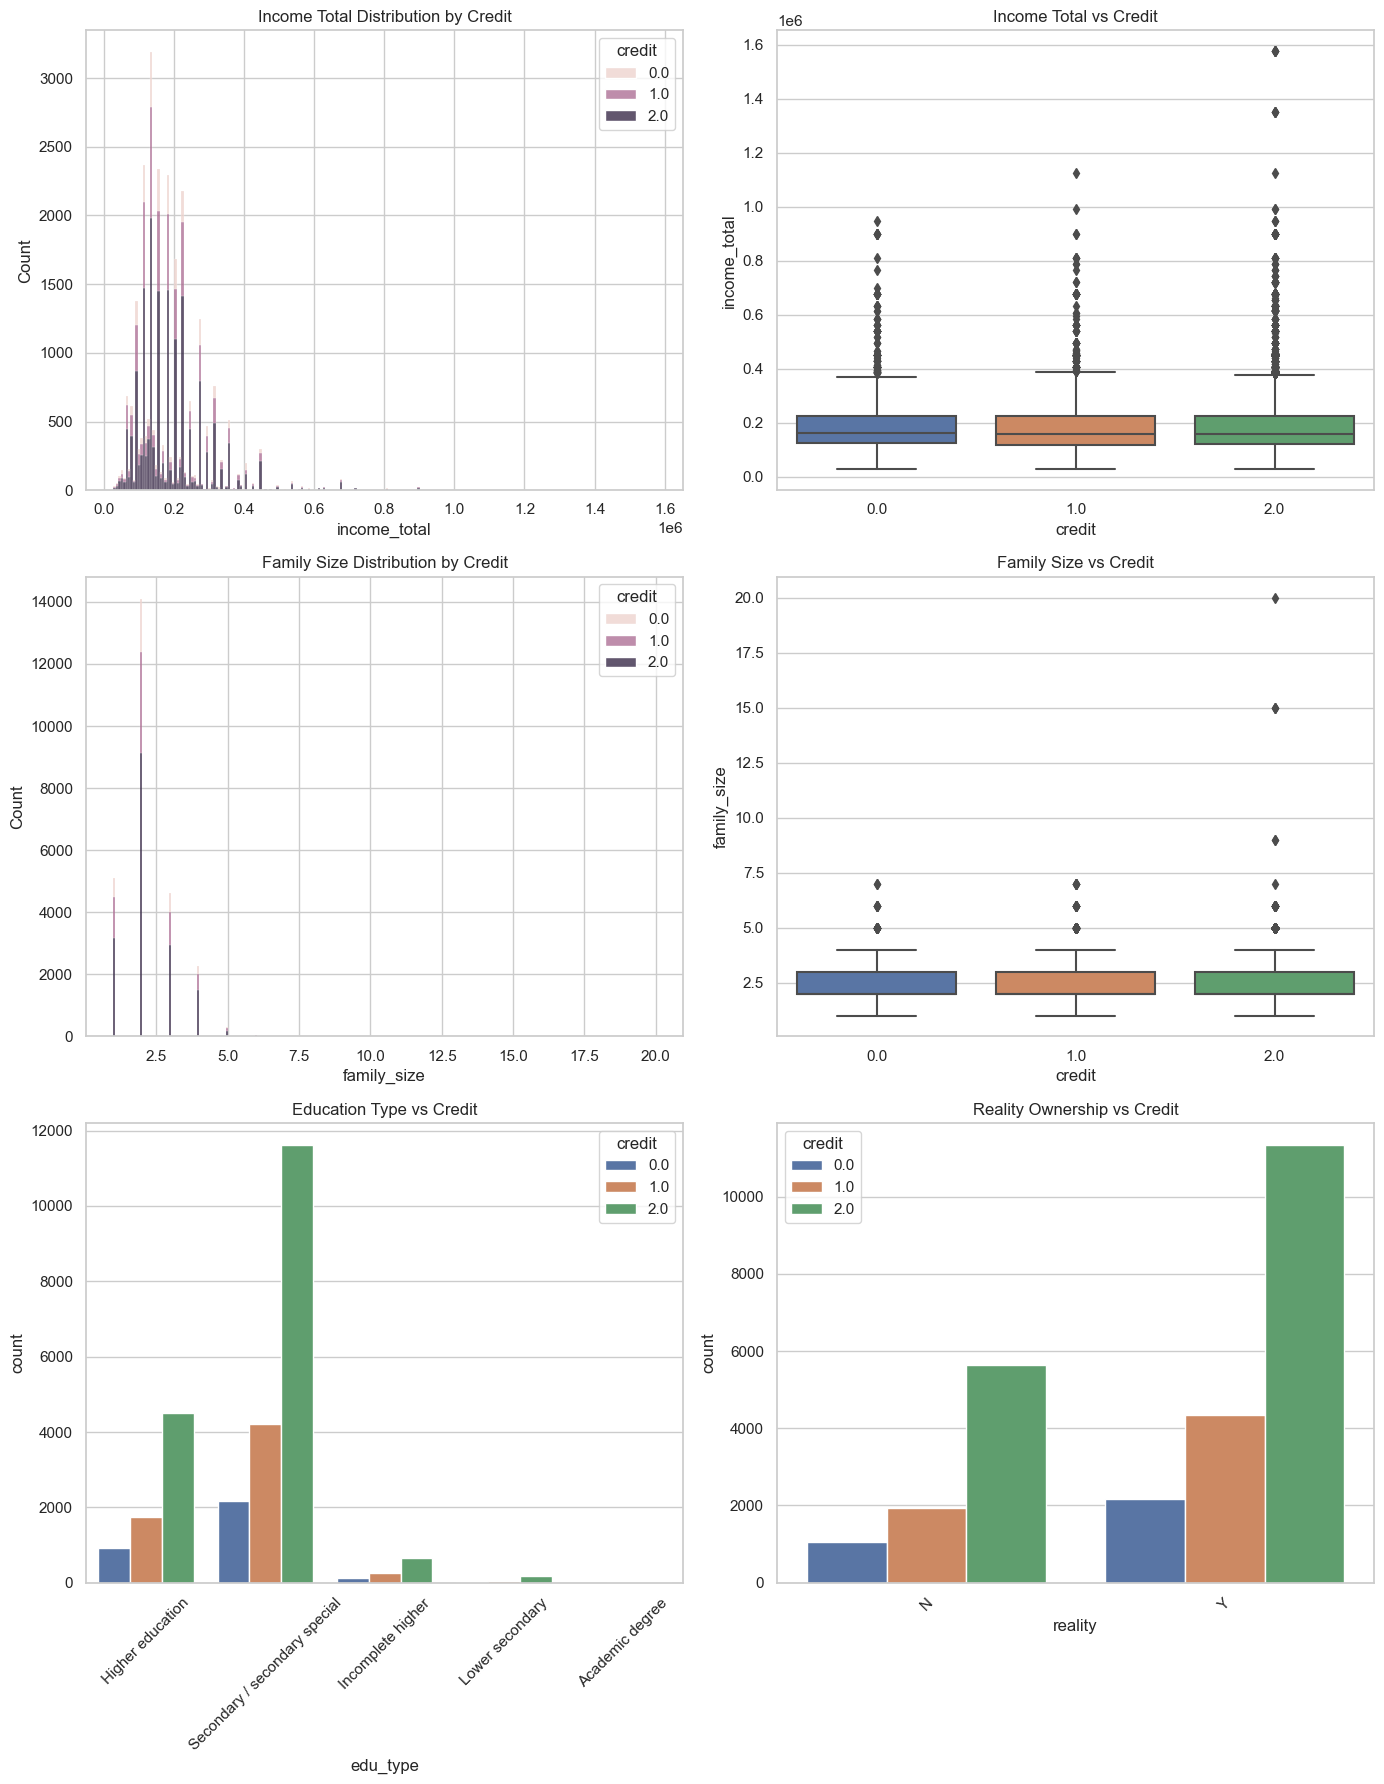

In [20]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating a figure to hold the subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 18))

# Plotting distributions and relationships with 'credit'
sns.histplot(data=train, x='income_total', hue='credit', multiple="stack", ax=axes[0, 0]).set_title('Income Total Distribution by Credit')
sns.boxplot(x='credit', y='income_total', data=train, ax=axes[0, 1]).set_title('Income Total vs Credit')

sns.histplot(data=train, x='family_size', hue='credit', multiple="stack", ax=axes[1, 0]).set_title('Family Size Distribution by Credit')
sns.boxplot(x='credit', y='family_size', data=train, ax=axes[1, 1]).set_title('Family Size vs Credit')

sns.countplot(x='edu_type', hue='credit', data=train, ax=axes[2, 0]).set_title('Education Type vs Credit')
axes[2, 0].tick_params(axis='x', rotation=45)
sns.countplot(x='reality', hue='credit', data=train, ax=axes[2, 1]).set_title('Reality Ownership vs Credit')
axes[2, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

1. **소득 분포 및 신용 등급**: 소득 분포에 따른 신용 등급은 크게 차이가 없는 것으로 확인이 된다. 따라서 가설 1을 지지하지 않는다.
2. **교육 수준 및 신용 등급**: 높은 교육 수준을 가진 그룹에서 낮은 연체 등급을 가진 경우가 더 많이 나타나는 경향이 있다고 보기는 어렵다. 이는 가설 2를 지지하지 않는다.
3. **부동산 소유 여부 및 신용 등급**: 부동산을 소유한 그룹에서 낮은 연체 등급을 가진 경우가 더 많이 나타나는 경향이 있다고 보기는 어렵다. 이 역시 가설 2를 지지하지 않는다.
4. **가족 규모 분포 및 신용 등급**: 가족 규모가 큰 그룹에서 연체 등급이 높은 경우가 상대적으로 더 많이 나타나는 경향이 있다. 이는 가설 3을 지지한다.

## 전처리

In [21]:
# 결측치 처리 -> 삭제
# why? -> 팀 자체적으로
train=train.drop('occyp_type', axis=1)
test=test.drop('occyp_type', axis=1)

In [22]:
# 주요 변수 아님 -> 삭제
train=train.drop(['index', 'FLAG_MOBIL'], axis=1)
test=test.drop(['index', 'FLAG_MOBIL'], axis=1)

In [23]:
# child_num vs family_size -> 자녀 수랑 가족 규모는 상관관계가 높음
# 자체적으로 가족 규모가 더 유의미 할 것으로 판단하여 자녀 수 삭제
train=train.drop('child_num', axis=1)
test=test.drop('child_num', axis=1)

In [24]:
# 이상치 처리 -> family_size
train.loc[train['family_size'] >= 4,'family_size']=4
test.loc[test['family_size']>=4, 'family_size']=4
print(train['family_size'].value_counts().sort_index())

1.0     5109
2.0    14106
3.0     4632
4.0     2610
Name: family_size, dtype: int64


In [25]:
train['gender'] = train['gender'].replace(['F','M'],[0,1])
test['gender'] = test['gender'].replace(['F','M'],[0,1])

train['car'] = train['car'].replace(['N','Y'],[0,1])
test['car'] = test['car'].replace(['N','Y'],[0,1])

train['reality'] = train['reality'].replace(['N','Y'],[0,1])
test['reality'] = test['reality'].replace(['N','Y'],[0,1])

In [26]:
def days_to_year(x):
    if x<0:
        return (x*(-1))/365
    return 0

def minus_to_plus(x):
    if x<0:
        return x*(-1)
    return 0

In [27]:
train['DAYS_BIRTH'] = train['DAYS_BIRTH'].apply(days_to_year)
train['DAYS_EMPLOYED'] = train['DAYS_EMPLOYED'].apply(days_to_year)
train['begin_month'] = train['begin_month'].apply(minus_to_plus)

test['DAYS_BIRTH'] = test['DAYS_BIRTH'].apply(days_to_year)
test['DAYS_EMPLOYED'] = test['DAYS_EMPLOYED'].apply(days_to_year)
test['begin_month'] = test['begin_month'].apply(minus_to_plus)

In [28]:
train.head()

,gender,car,reality,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit
0,0,0,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,38.079452,12.901370,0,0,0,2.0,6.0,1.0
1,0,0,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,31.178082,4.219178,0,0,1,3.0,5.0,1.0
2,1,1,1,450000.0,Working,Higher education,Married,House / apartment,52.293151,12.147945,0,1,0,2.0,22.0,2.0
3,0,0,1,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,41.336986,5.731507,0,1,0,2.0,37.0,0.0
4,0,1,1,157500.0,State servant,Higher education,Married,House / apartment,41.197260,5.767123,0,0,0,2.0,26.0,2.0


In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         26457 non-null  int64  
 1   car            26457 non-null  int64  
 2   reality        26457 non-null  int64  
 3   income_total   26457 non-null  float64
 4   income_type    26457 non-null  object 
 5   edu_type       26457 non-null  object 
 6   family_type    26457 non-null  object 
 7   house_type     26457 non-null  object 
 8   DAYS_BIRTH     26457 non-null  float64
 9   DAYS_EMPLOYED  26457 non-null  float64
 10  work_phone     26457 non-null  int64  
 11  phone          26457 non-null  int64  
 12  email          26457 non-null  int64  
 13  family_size    26457 non-null  float64
 14  begin_month    26457 non-null  float64
 15  credit         26457 non-null  float64
dtypes: float64(6), int64(6), object(4)
memory usage: 3.2+ MB


### Categorical Features:

카테고리컬 변수는 남자를 1, 여자를 0로 표시하였을 때와 같이 숫자의 순서가 존재하지 않는 변수로,

Binary
- gender: 성별,
- car: 차량 소유 여부,
- reality: 부동산 소유 여부,
- FLAG_MOBIL: 핸드폰 소유 여부.
- work_phone: 업무용 전화 소유 여부,
- phone: 전화 소유 여부,
- email: 이메일 소유 여부,

Multi
- family_size: 가족 규모,
- house_type: 생활 방식,
- occyp_type: 직업 유형,
- income_type: 소득 분류.
- family_type: 결혼 여부,

### Ordinal Features:
순서형 변수의 경우 인코딩을 하였을 때 상, 중, 하와 같이 비교가 가능한 변수로,
- edu_type: 교육 수준,
- credit : 신용 기준

## Ordinal 인코딩

In [30]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

#교육 수준 순서 고려
edu_type_mapping = {
    'Lower secondary': 0,
    'Secondary / secondary special': 1,
    'Incomplete higher': 2,
    'Higher education': 3,
    'Academic degree': 4
}
train['edu_type'] = train['edu_type'].map(edu_type_mapping)
test['edu_type'] = test['edu_type'].map(edu_type_mapping)

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         26457 non-null  int64  
 1   car            26457 non-null  int64  
 2   reality        26457 non-null  int64  
 3   income_total   26457 non-null  float64
 4   income_type    26457 non-null  object 
 5   edu_type       26457 non-null  int64  
 6   family_type    26457 non-null  object 
 7   house_type     26457 non-null  object 
 8   DAYS_BIRTH     26457 non-null  float64
 9   DAYS_EMPLOYED  26457 non-null  float64
 10  work_phone     26457 non-null  int64  
 11  phone          26457 non-null  int64  
 12  email          26457 non-null  int64  
 13  family_size    26457 non-null  float64
 14  begin_month    26457 non-null  float64
 15  credit         26457 non-null  float64
dtypes: float64(6), int64(7), object(3)
memory usage: 3.2+ MB


## 원핫 인코딩

In [32]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

income_type_encoded = encoder.fit_transform(train[['income_type']])
income_type_encoded_df = pd.DataFrame(income_type_encoded, columns=encoder.get_feature_names_out(['income_type']))
train = pd.concat([train, income_type_encoded_df], axis=1).drop('income_type', axis=1)

income_type_encoded_test = encoder.transform(test[['income_type']])
income_type_encoded_test_df = pd.DataFrame(income_type_encoded_test, columns=encoder.get_feature_names_out(['income_type']))
test = pd.concat([test, income_type_encoded_test_df], axis=1).drop('income_type', axis=1)

encoder = OneHotEncoder(sparse_output=False)
family_type_encoded = encoder.fit_transform(train[['family_type']])
family_type_encoded_df = pd.DataFrame(family_type_encoded, columns=encoder.get_feature_names_out(['family_type']))
train = pd.concat([train, family_type_encoded_df], axis=1).drop('family_type', axis=1)

family_type_encoded_test = encoder.transform(test[['family_type']])
family_type_encoded_test_df = pd.DataFrame(family_type_encoded_test, columns=encoder.get_feature_names_out(['family_type']))
test = pd.concat([test, family_type_encoded_test_df], axis=1).drop('family_type', axis=1)

encoder = OneHotEncoder(sparse_output=False)
house_type_encoded = encoder.fit_transform(train[['house_type']])
house_type_encoded_df = pd.DataFrame(house_type_encoded, columns=encoder.get_feature_names_out(['house_type']))
train = pd.concat([train, house_type_encoded_df], axis=1).drop('house_type', axis=1)

house_type_encoded_test = encoder.transform(test[['house_type']])
house_type_encoded_test_df = pd.DataFrame(house_type_encoded_test, columns=encoder.get_feature_names_out(['house_type']))
test = pd.concat([test, house_type_encoded_test_df], axis=1).drop('house_type', axis=1)

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   gender                            26457 non-null  int64  
 1   car                               26457 non-null  int64  
 2   reality                           26457 non-null  int64  
 3   income_total                      26457 non-null  float64
 4   edu_type                          26457 non-null  int64  
 5   DAYS_BIRTH                        26457 non-null  float64
 6   DAYS_EMPLOYED                     26457 non-null  float64
 7   work_phone                        26457 non-null  int64  
 8   phone                             26457 non-null  int64  
 9   email                             26457 non-null  int64  
 10  family_size                       26457 non-null  float64
 11  begin_month                       26457 non-null  float64
 12  cred

In [34]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   gender                            10000 non-null  int64  
 1   car                               10000 non-null  int64  
 2   reality                           10000 non-null  int64  
 3   income_total                      10000 non-null  float64
 4   edu_type                          10000 non-null  int64  
 5   DAYS_BIRTH                        10000 non-null  float64
 6   DAYS_EMPLOYED                     10000 non-null  float64
 7   work_phone                        10000 non-null  int64  
 8   phone                             10000 non-null  int64  
 9   email                             10000 non-null  int64  
 10  family_size                       10000 non-null  float64
 11  begin_month                       10000 non-null  float64
 12  incom

### train, test 전처리 및 인코딩 완료

## 모델 빌딩

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import log_loss

X = train.drop('credit', axis=1)
y = train['credit']

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size=0.2,
                                                    random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("log_loss:", log_loss(y_test, y_proba))

print(classification_report(y_test, y_pred, zero_division=1))

Accuracy: 0.7069160997732427
log_loss: 0.9964834931761883
              precision    recall  f1-score   support

         0.0       0.43      0.28      0.34       650
         1.0       0.62      0.50      0.55      1262
         2.0       0.76      0.87      0.81      3380

    accuracy                           0.71      5292
   macro avg       0.60      0.55      0.57      5292
weighted avg       0.69      0.71      0.69      5292



- 정확도 (Accuracy): 전체 예측 중 올바르게 분류된 샘플의 비율입니다. 이 모델은 약 70.7%의 정확도를 보입니다.
- 정밀도 (Precision): 양성 클래스로 예측된 샘플 중 실제로 양성 클래스인 비율입니다.
    - 0.0 클래스의 정밀도는 0.43로, 양성으로 분류된 것 중에서 실제로 양성인 것은 43%입니다.
    - 1.0 클래스의 정밀도는 0.62로, 양성으로 분류된 것 중에서 실제로 양성인 것은 62%입니다.
    - 2.0 클래스의 정밀도는 0.76로, 양성으로 분류된 것 중에서 실제로 양성인 것은 76%입니다.
- 재현율 (Recall): 실제 양성 클래스 샘플 중에 모델이 양성으로 분류한 샘플의 비율입니다.
    - 0.0 클래스의 재현율은 0.28로, 실제 양성 클래스 중에서 28%만이 모델에 의해 양성으로 분류되었습니다.
    - 1.0 클래스의 재현율은 0.50으로, 실제 양성 클래스 중에서 50%만이 모델에 의해 양성으로 분류되었습니다.
    - 2.0 클래스의 재현율은 0.87로, 실제 양성 클래스 중에서 87%만이 모델에 의해 양성으로 분류되었습니다.
- F1 점수 (F1-score): 정밀도와 재현율의 조화 평균입니다. 클래스별로 계산되며, 이 지표는 모델의 균형을 나타냅니다.
    - 0.0 클래스의 F1 점수는 0.34입니다.
    - 1.0 클래스의 F1 점수는 0.55입니다.
    - 2.0 클래스의 F1 점수는 0.81입니다.
- 지원 (Support): 각 클래스에 대한 실제 샘플 수입니다.
- 이 분류 보고서를 통해 모델의 성능을 자세히 이해할 수 있습니다. **이 모델은 클래스 2.0에 대해 상당히 높은 정밀도와 재현율을 보이며, 클래스 0.0과 1.0에 대해서는 낮은 정밀도와 재현율을 보입니다.**

## 하이퍼마라미터 탐색

In [36]:
# from sklearn.model_selection import GridSearchCV

# # 그리드 탐색을 위한 하이퍼파라미터 그리드 정의
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # GridSearchCV 객체 생성
# grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, 
#                            cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# # 그리드 탐색 수행
# grid_search.fit(X_train, y_train)

# # 최적의 하이퍼파라미터와 최고의 교차 검증 성능 출력
# print("Best Hyperparameters:", grid_search.best_params_)
# print("Best CV Score:", grid_search.best_score_)

**결과**
- Fitting 5 folds for each of 108 candidates, totalling 540 fits
- Best Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
- Best CV Score: 0.7151429246397354

In [37]:
# 그리드 탐색으로 찾은 최적의 하이퍼파라미터로 모델 학습
clf = RandomForestClassifier(n_estimators=200, max_depth=30, min_samples_leaf=2,
                             min_samples_split=2, random_state=42)
clf.fit(X_train, y_train)

# 예측 및 평가
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("log_loss:", log_loss(y_test, y_proba))
print(classification_report(y_test, y_pred, zero_division=1))

Accuracy: 0.7180650037792895
log_loss: 0.7178109225649864
              precision    recall  f1-score   support

         0.0       0.58      0.14      0.22       650
         1.0       0.70      0.39      0.50      1262
         2.0       0.73      0.95      0.82      3380

    accuracy                           0.72      5292
   macro avg       0.67      0.49      0.52      5292
weighted avg       0.70      0.72      0.67      5292



## 변수별 주요 영향도

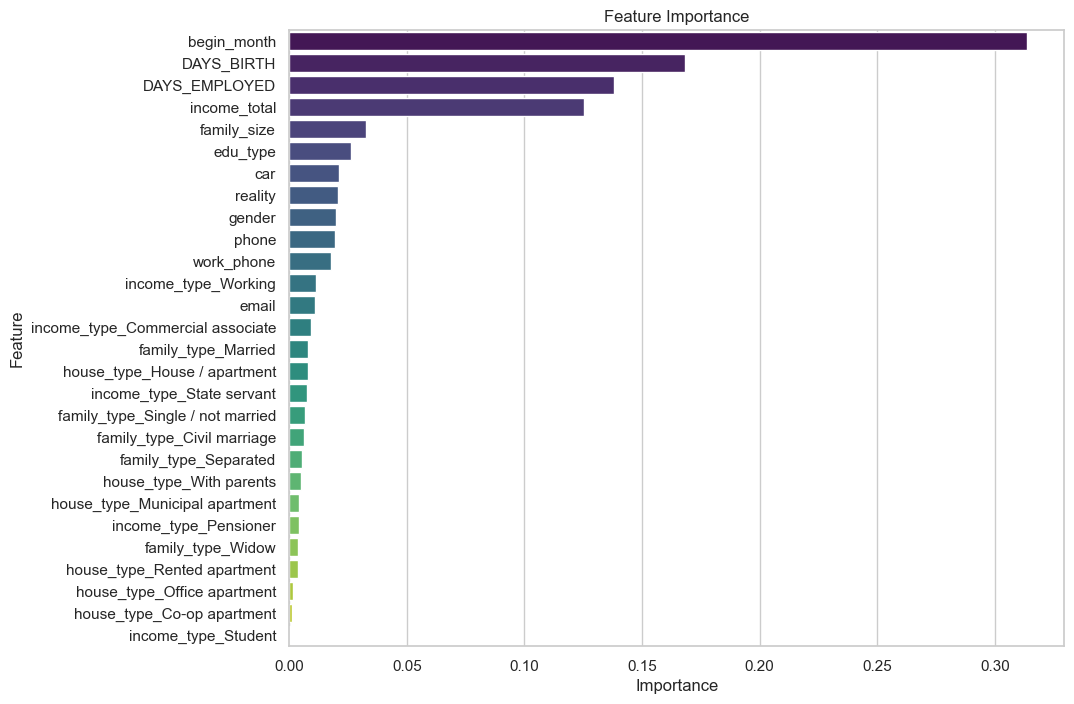

In [38]:
# feature importance 추출
feature_importances = clf.feature_importances_

# 컬럼명과 함께 DataFrame 생성
features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# 중요도 순으로 정렬
features.sort_values(by='Importance', ascending=False, inplace=True)

# 중요도 시각화
plt.figure(figsize=(10, 8))
# seaborn의 컬러 팔레트를 사용하여 각 막대에 색을 적용합니다
sns.barplot(x='Importance', y='Feature', data=features, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


In [39]:
scaler = StandardScaler()
test_scaled = scaler.fit_transform(test)

result = clf.predict_proba(test_scaled)

In [40]:
my_submission = result 
sample_submission.loc[:,1:]=my_submission

In [41]:
sample_submission

,index,0,1,2
0,26457,0.038594,0.224381,0.737025
1,26458,0.102851,0.169040,0.728110
2,26459,0.061379,0.116286,0.822334
3,26460,0.097484,0.108983,0.793533
4,26461,0.119912,0.247861,0.632227
...,...,...,...,...
9995,36452,0.084350,0.126694,0.788956
9996,36453,0.239267,0.316249,0.444485
9997,36454,0.042891,0.145397,0.811712
9998,36455,0.271509,0.287321,0.441170


## K-fold cross validation

In [42]:
from sklearn.model_selection import StratifiedKFold

# k-폴드 설정
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=55)
outcomes = []
sub = np.zeros((test_scaled.shape[0], 3))  # test_scaled는 테스트 데이터의 스케일링 된 버전입니다.
n_splits = folds.n_splits
y_preds = []  # 검증 세트에 대한 예측을 저장하기 위한 리스트
val_indices = []  # 검증 세트의 인덱스를 저장

for n_fold, (train_index, val_index) in enumerate(folds.split(X_scaled, y)):
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y[train_index], y[val_index]
    # 그리드 탐색으로 찾은 최적의 하이퍼파라미터로 모델 학습
    clf = RandomForestClassifier(n_estimators=200, max_depth=30, min_samples_leaf=2,
                             min_samples_split=2, random_state=42)
#     clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    predictions = clf.predict_proba(X_val)
    val_preds = clf.predict(X_val)  # 검증 세트에 대한 클래스 예측
    y_preds.extend(val_preds)  # 예측 저장
    val_indices.extend(val_index)  # 인덱스 저장

    # 정확한 로그 손실 계산을 위한 one-hot 인코딩
    from sklearn.preprocessing import LabelBinarizer
    lb = LabelBinarizer()
    y_val_onehot = lb.fit_transform(y_val)
    
    sub += clf.predict_proba(test_scaled)
    logloss = log_loss(y_val_onehot, predictions)
    outcomes.append(logloss)

sub /= n_splits
mean_logloss = np.mean(outcomes)

# 정확도 및 분류 보고서 출력
print("Accuracy:", accuracy_score(y[val_indices], y_preds))  # 전체 검증 데이터에 대한 정확도 계산
print("Mean Log Loss:", mean_logloss)
print(classification_report(y[val_indices], y_preds, zero_division=1))  # 분류 보고서

Accuracy: 0.7204898514570813
Mean Log Loss: 0.7113339064143454
              precision    recall  f1-score   support

         0.0       0.61      0.14      0.23      3222
         1.0       0.69      0.39      0.50      6267
         2.0       0.73      0.95      0.83     16968

    accuracy                           0.72     26457
   macro avg       0.68      0.50      0.52     26457
weighted avg       0.71      0.72      0.68     26457



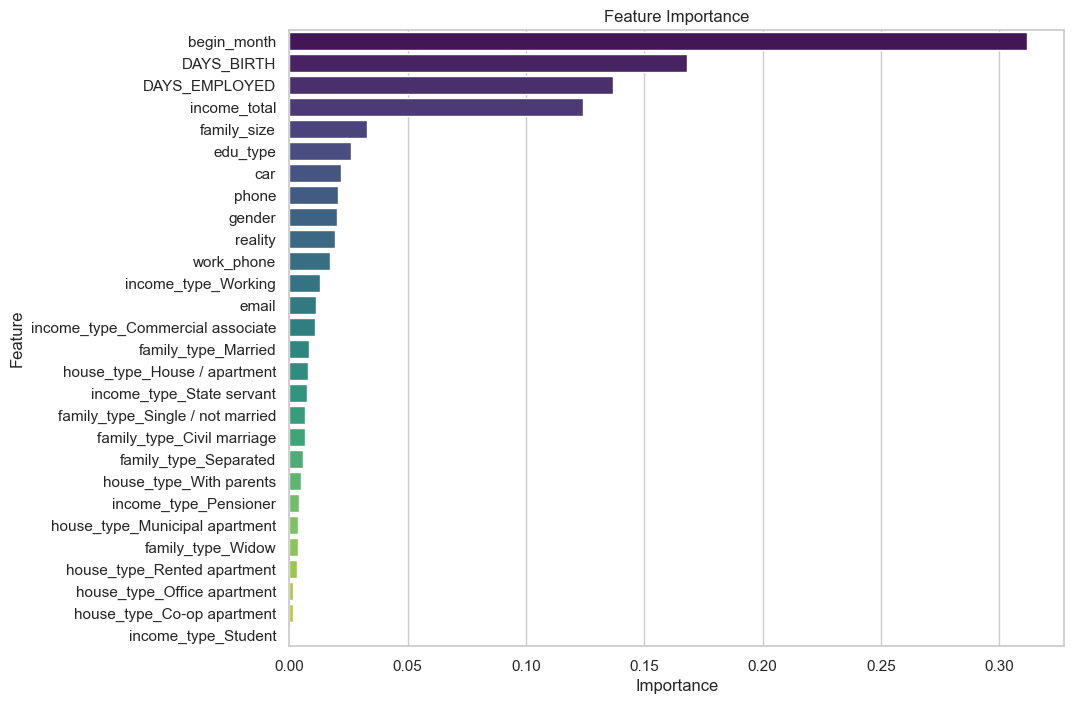

In [43]:
# 랜덤 포레스트 분류기의 특성 중요도 추출
feature_importances = clf.feature_importances_

# 컬럼명과 함께 DataFrame 생성
features = pd.DataFrame({
    'Feature': X.columns,  # X는 원본 특성 이름이 있는 DataFrame이어야 합니다.
    'Importance': feature_importances
})

# 중요도 순으로 정렬
features.sort_values(by='Importance', ascending=False, inplace=True)

# 중요도 시각화
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=features, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [44]:
sample_submission.iloc[:,1:] =  sub
sample_submission.to_csv("result_3.csv", index = False)

In [45]:
sample_submission

,index,0,1,2
0,26457,0.069791,0.199052,0.731157
1,26458,0.232772,0.230185,0.537043
2,26459,0.073778,0.110115,0.816107
3,26460,0.132278,0.104813,0.762909
4,26461,0.098158,0.224866,0.676976
...,...,...,...,...
9995,36452,0.096116,0.250348,0.653537
9996,36453,0.233015,0.308395,0.458589
9997,36454,0.027796,0.100179,0.872025
9998,36455,0.220157,0.361944,0.417898
